# Random Forest

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn.ensemble import RandomForestClassifier

In [14]:
dataset = pd.read_csv("ingresos.csv")
print(dataset.head(10))
(dataset.describe())

   edad  estudio  genero  tipo_trabajo  horas  ingreso
0    27        9       0             0     40        0
1    30        9       0             0     40        0
2    34        8       0             0     40        0
3    26       13       0             0     50        0
4    23        4       1             0     25        0
5    20       10       1             0     40        0
6    21       10       0             0     15        0
7    42        9       1             0     40        1
8    68        9       1             1     25        0
9    41       10       1             0     40        1


,edad,estudio,genero,tipo_trabajo,horas,ingreso
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,39.740000,9.590000,0.670000,0.330000,40.550000,0.21000
std,15.959937,3.008725,0.472582,0.472582,12.130915,0.40936
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.00000
25%,27.000000,9.000000,0.000000,0.000000,40.000000,0.00000
50%,35.500000,9.000000,1.000000,0.000000,40.000000,0.00000
75%,52.250000,10.000000,1.000000,1.000000,45.000000,0.00000
max,80.000000,16.000000,1.000000,1.000000,72.000000,1.00000


In [16]:
# Partitioning the Dataset

# max features per tree = sqrt(len(features))

forest = RandomForestClassifier(n_estimators=100, 
                                criterion='gini',  # 'entropy' is also another criterion
                                max_features='sqrt',
                                bootstrap=True,
                                max_samples=2/3,
                                oob_score=True,
                                random_state=170)

forest.fit(dataset[dataset.columns[:-1]].values, dataset["ingreso"].values)

print(forest.predict([[50, 16, 1, 1, 40]]))
print(forest.score(dataset[dataset.columns[:-1]].values, dataset["ingreso"].values))
print(forest.oob_score_)

[1]
0.98
0.78


## Visualizing the forest

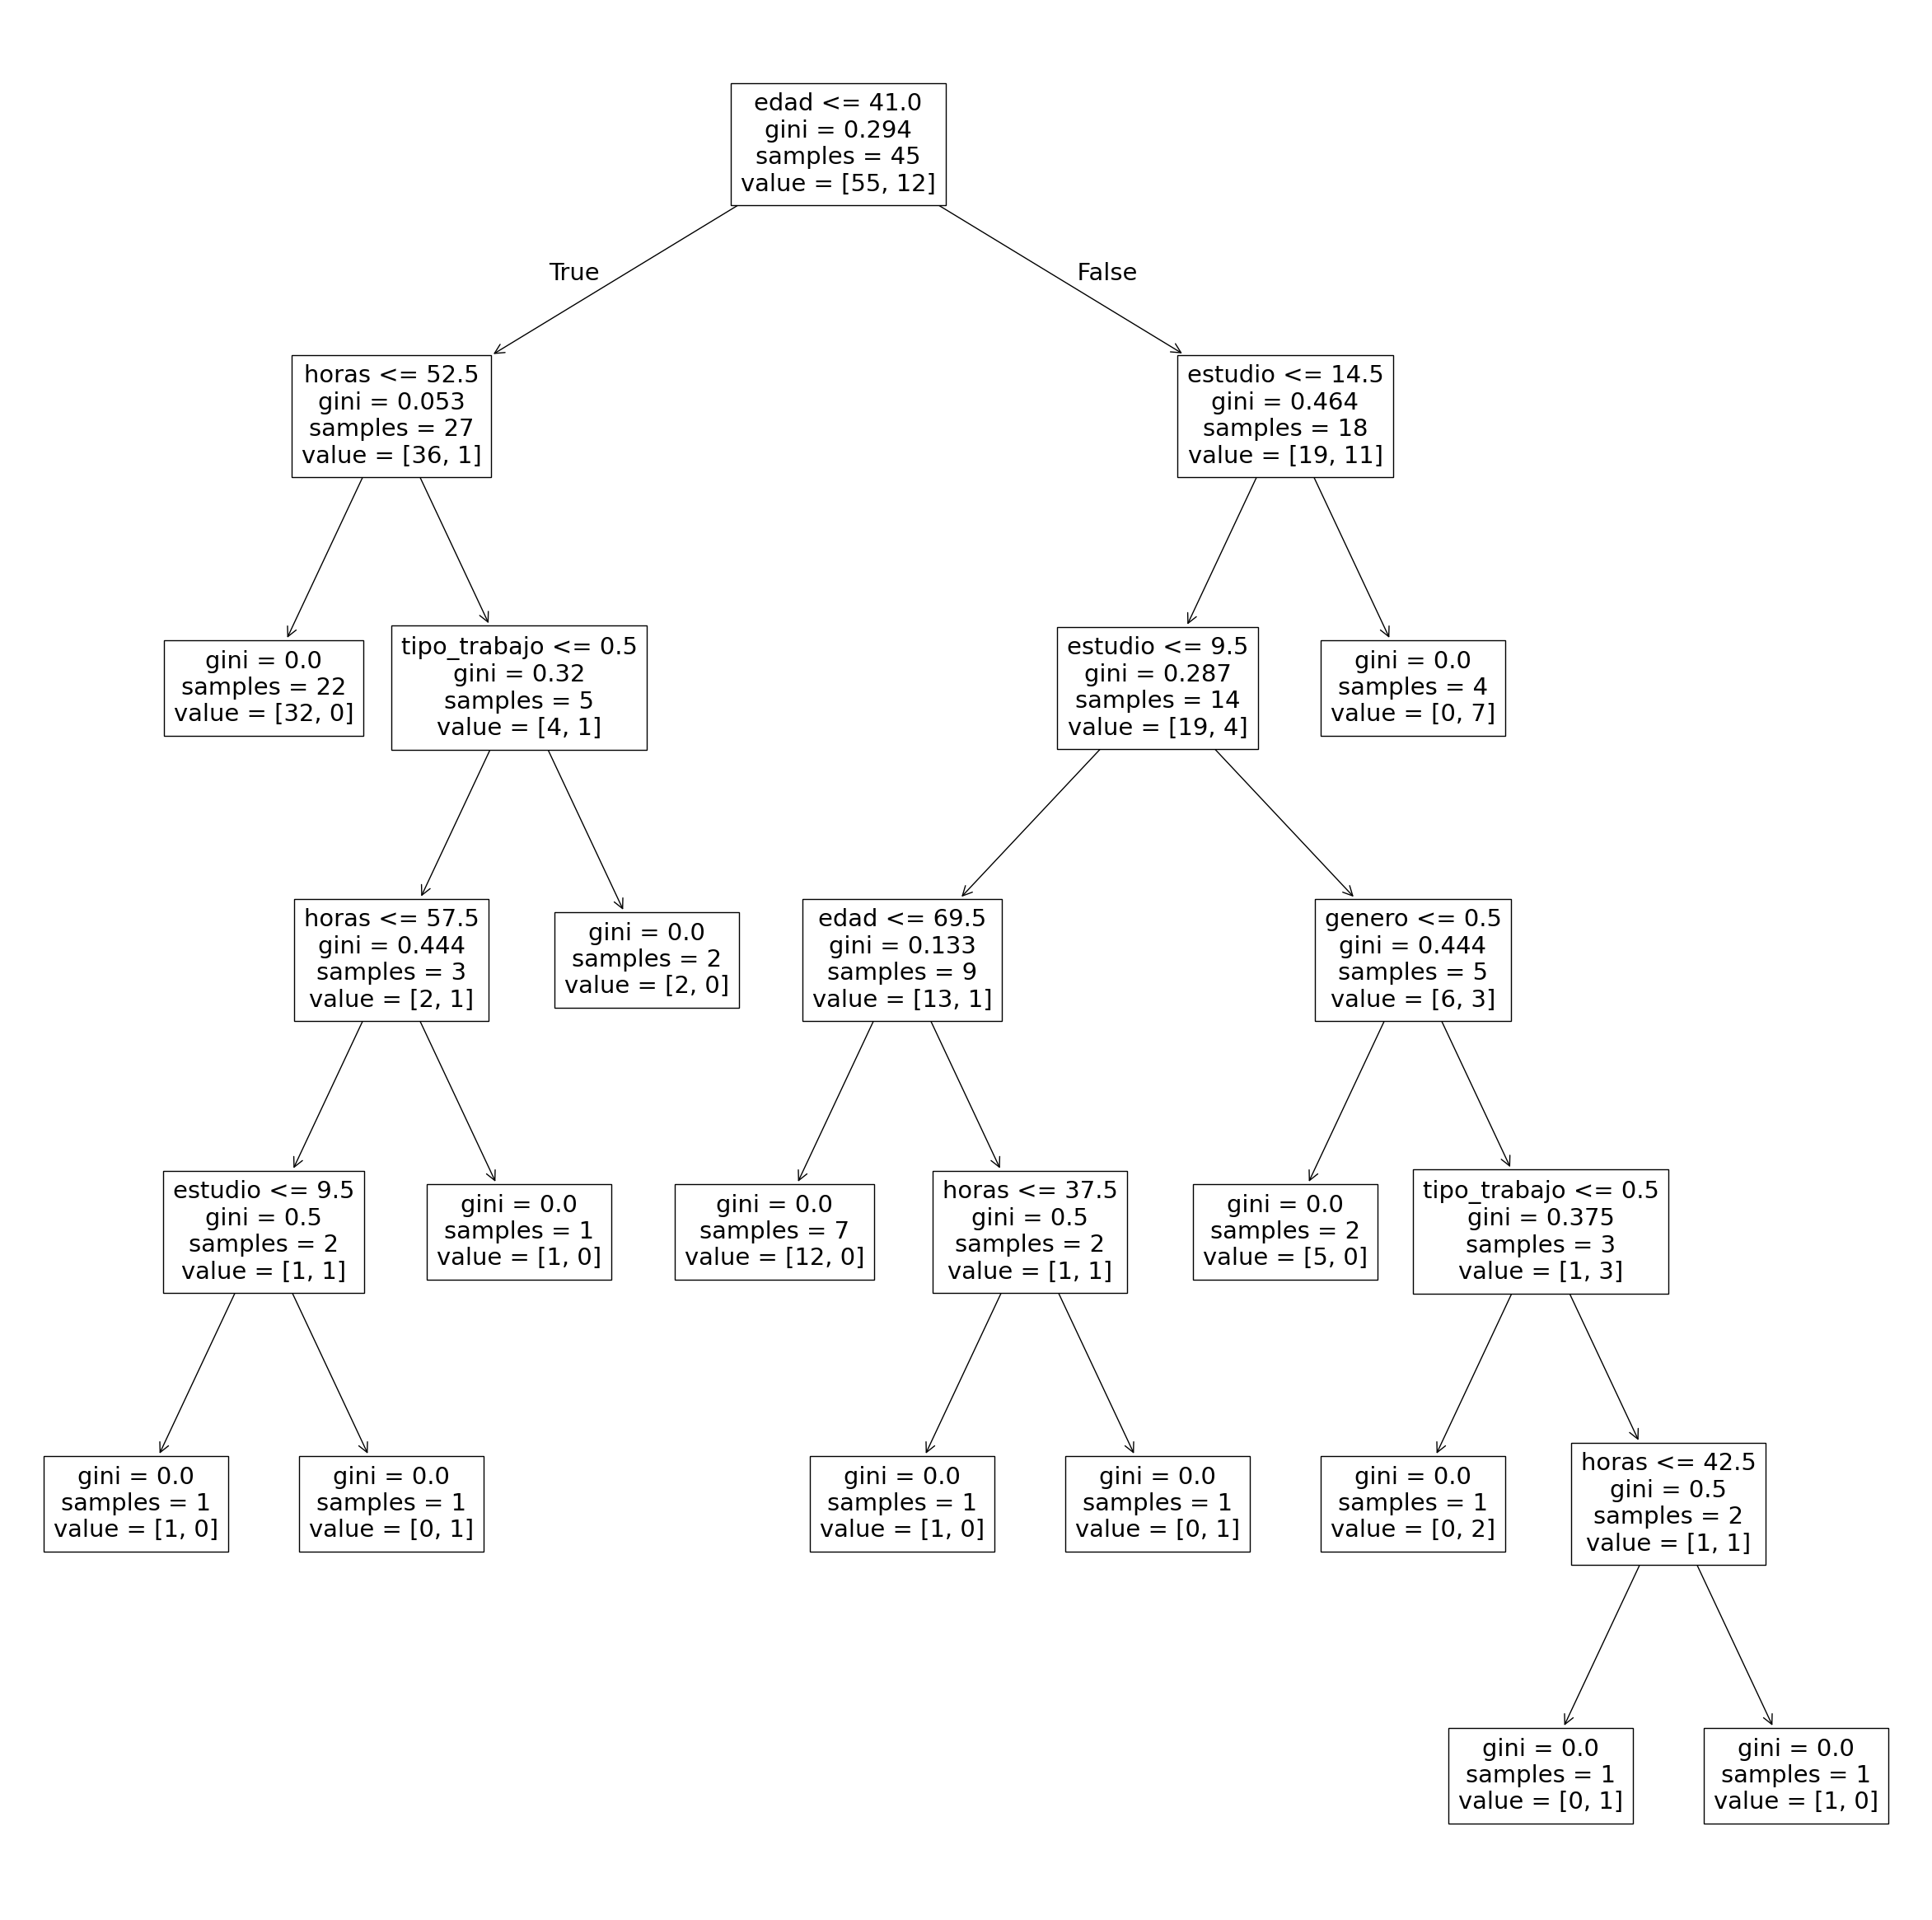

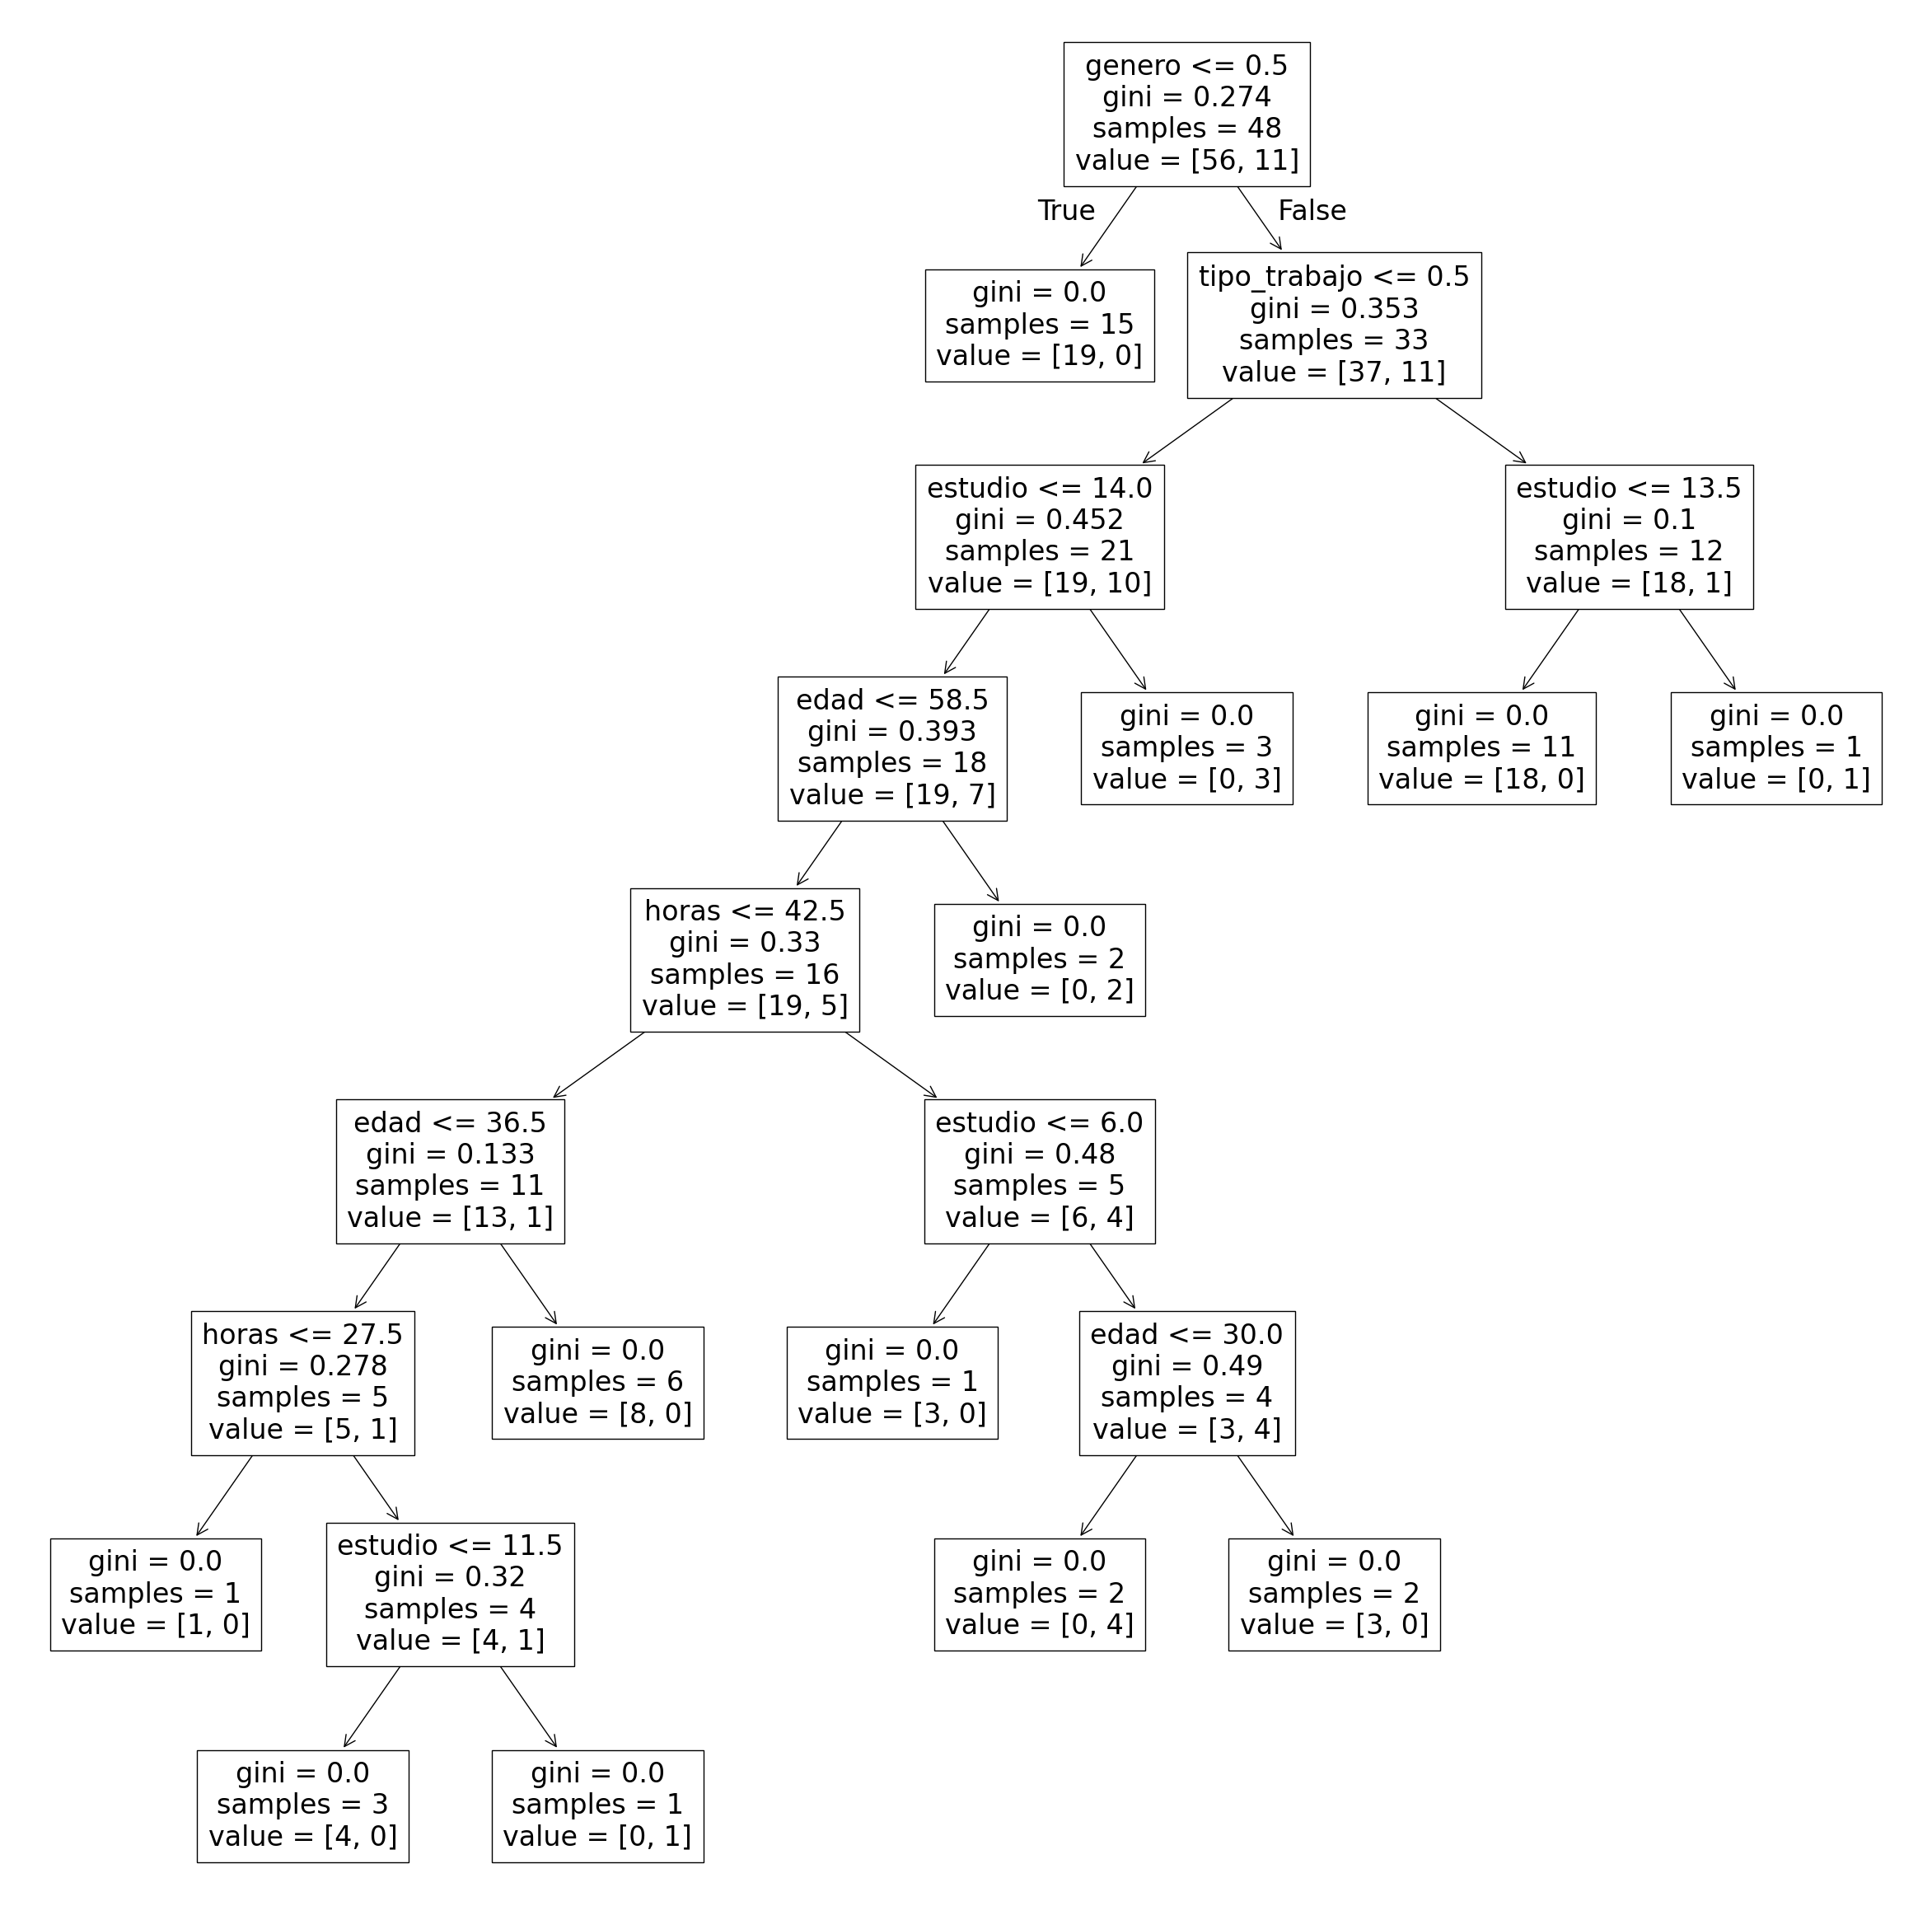

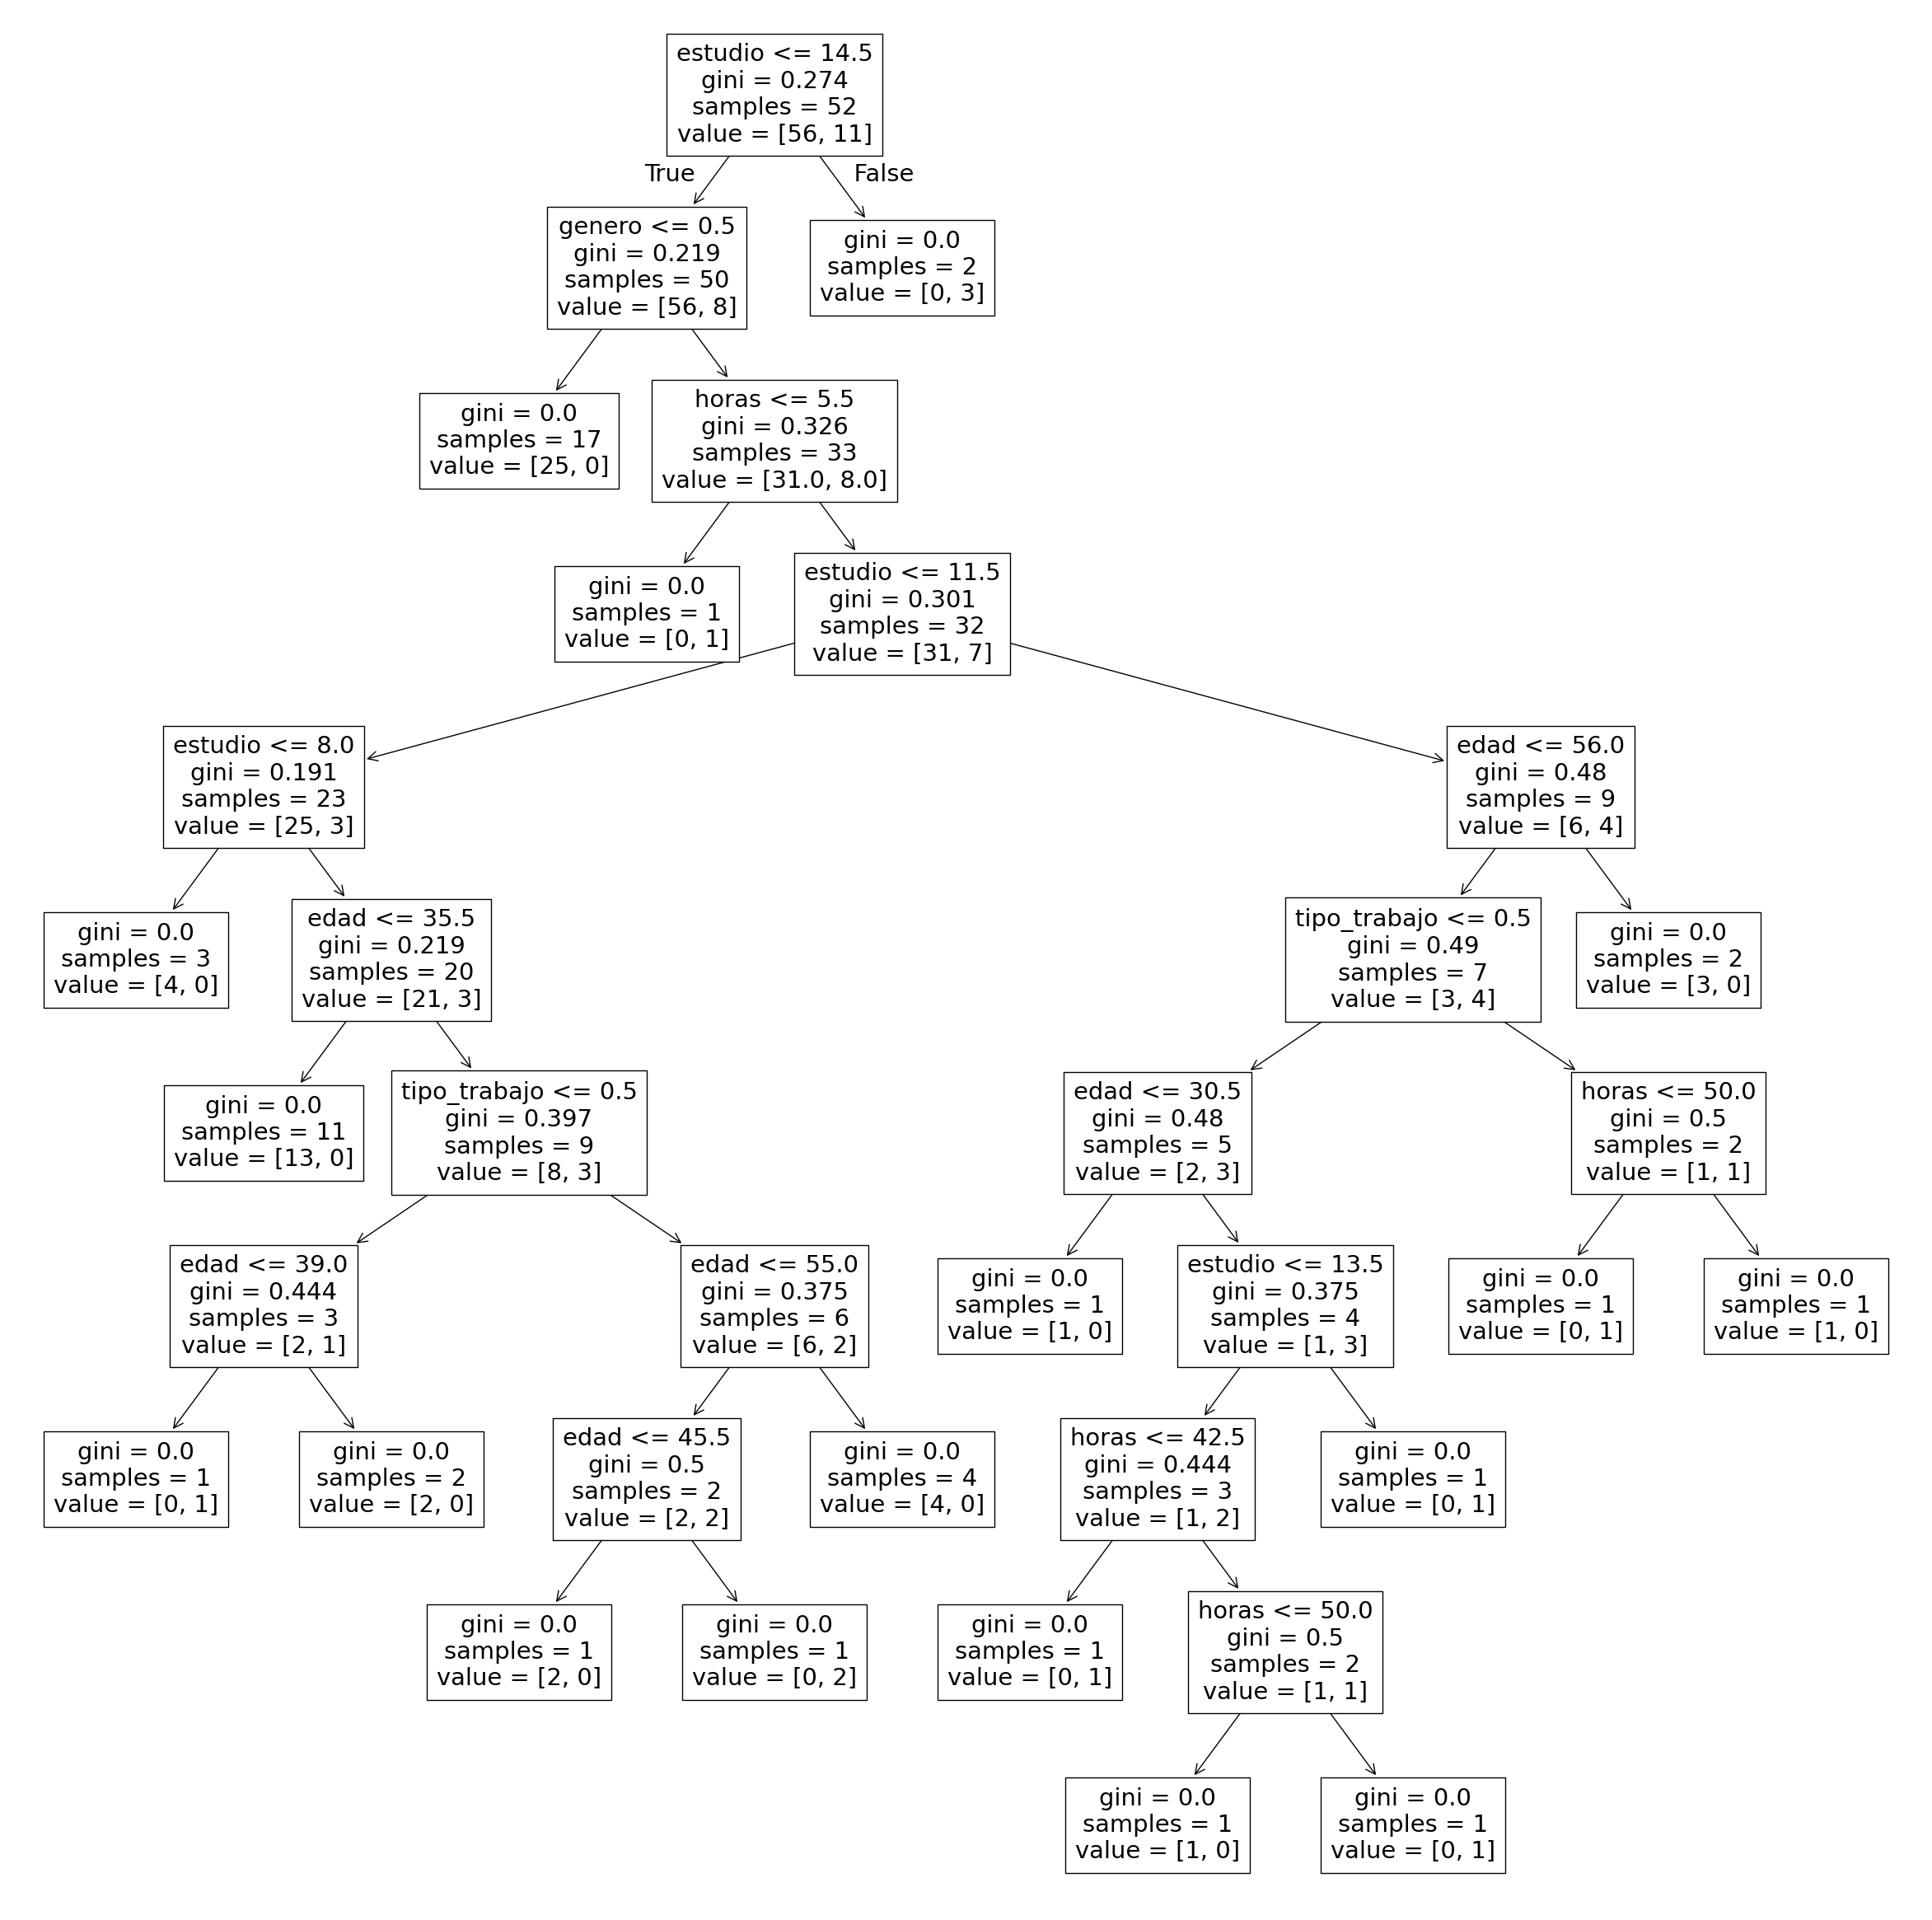

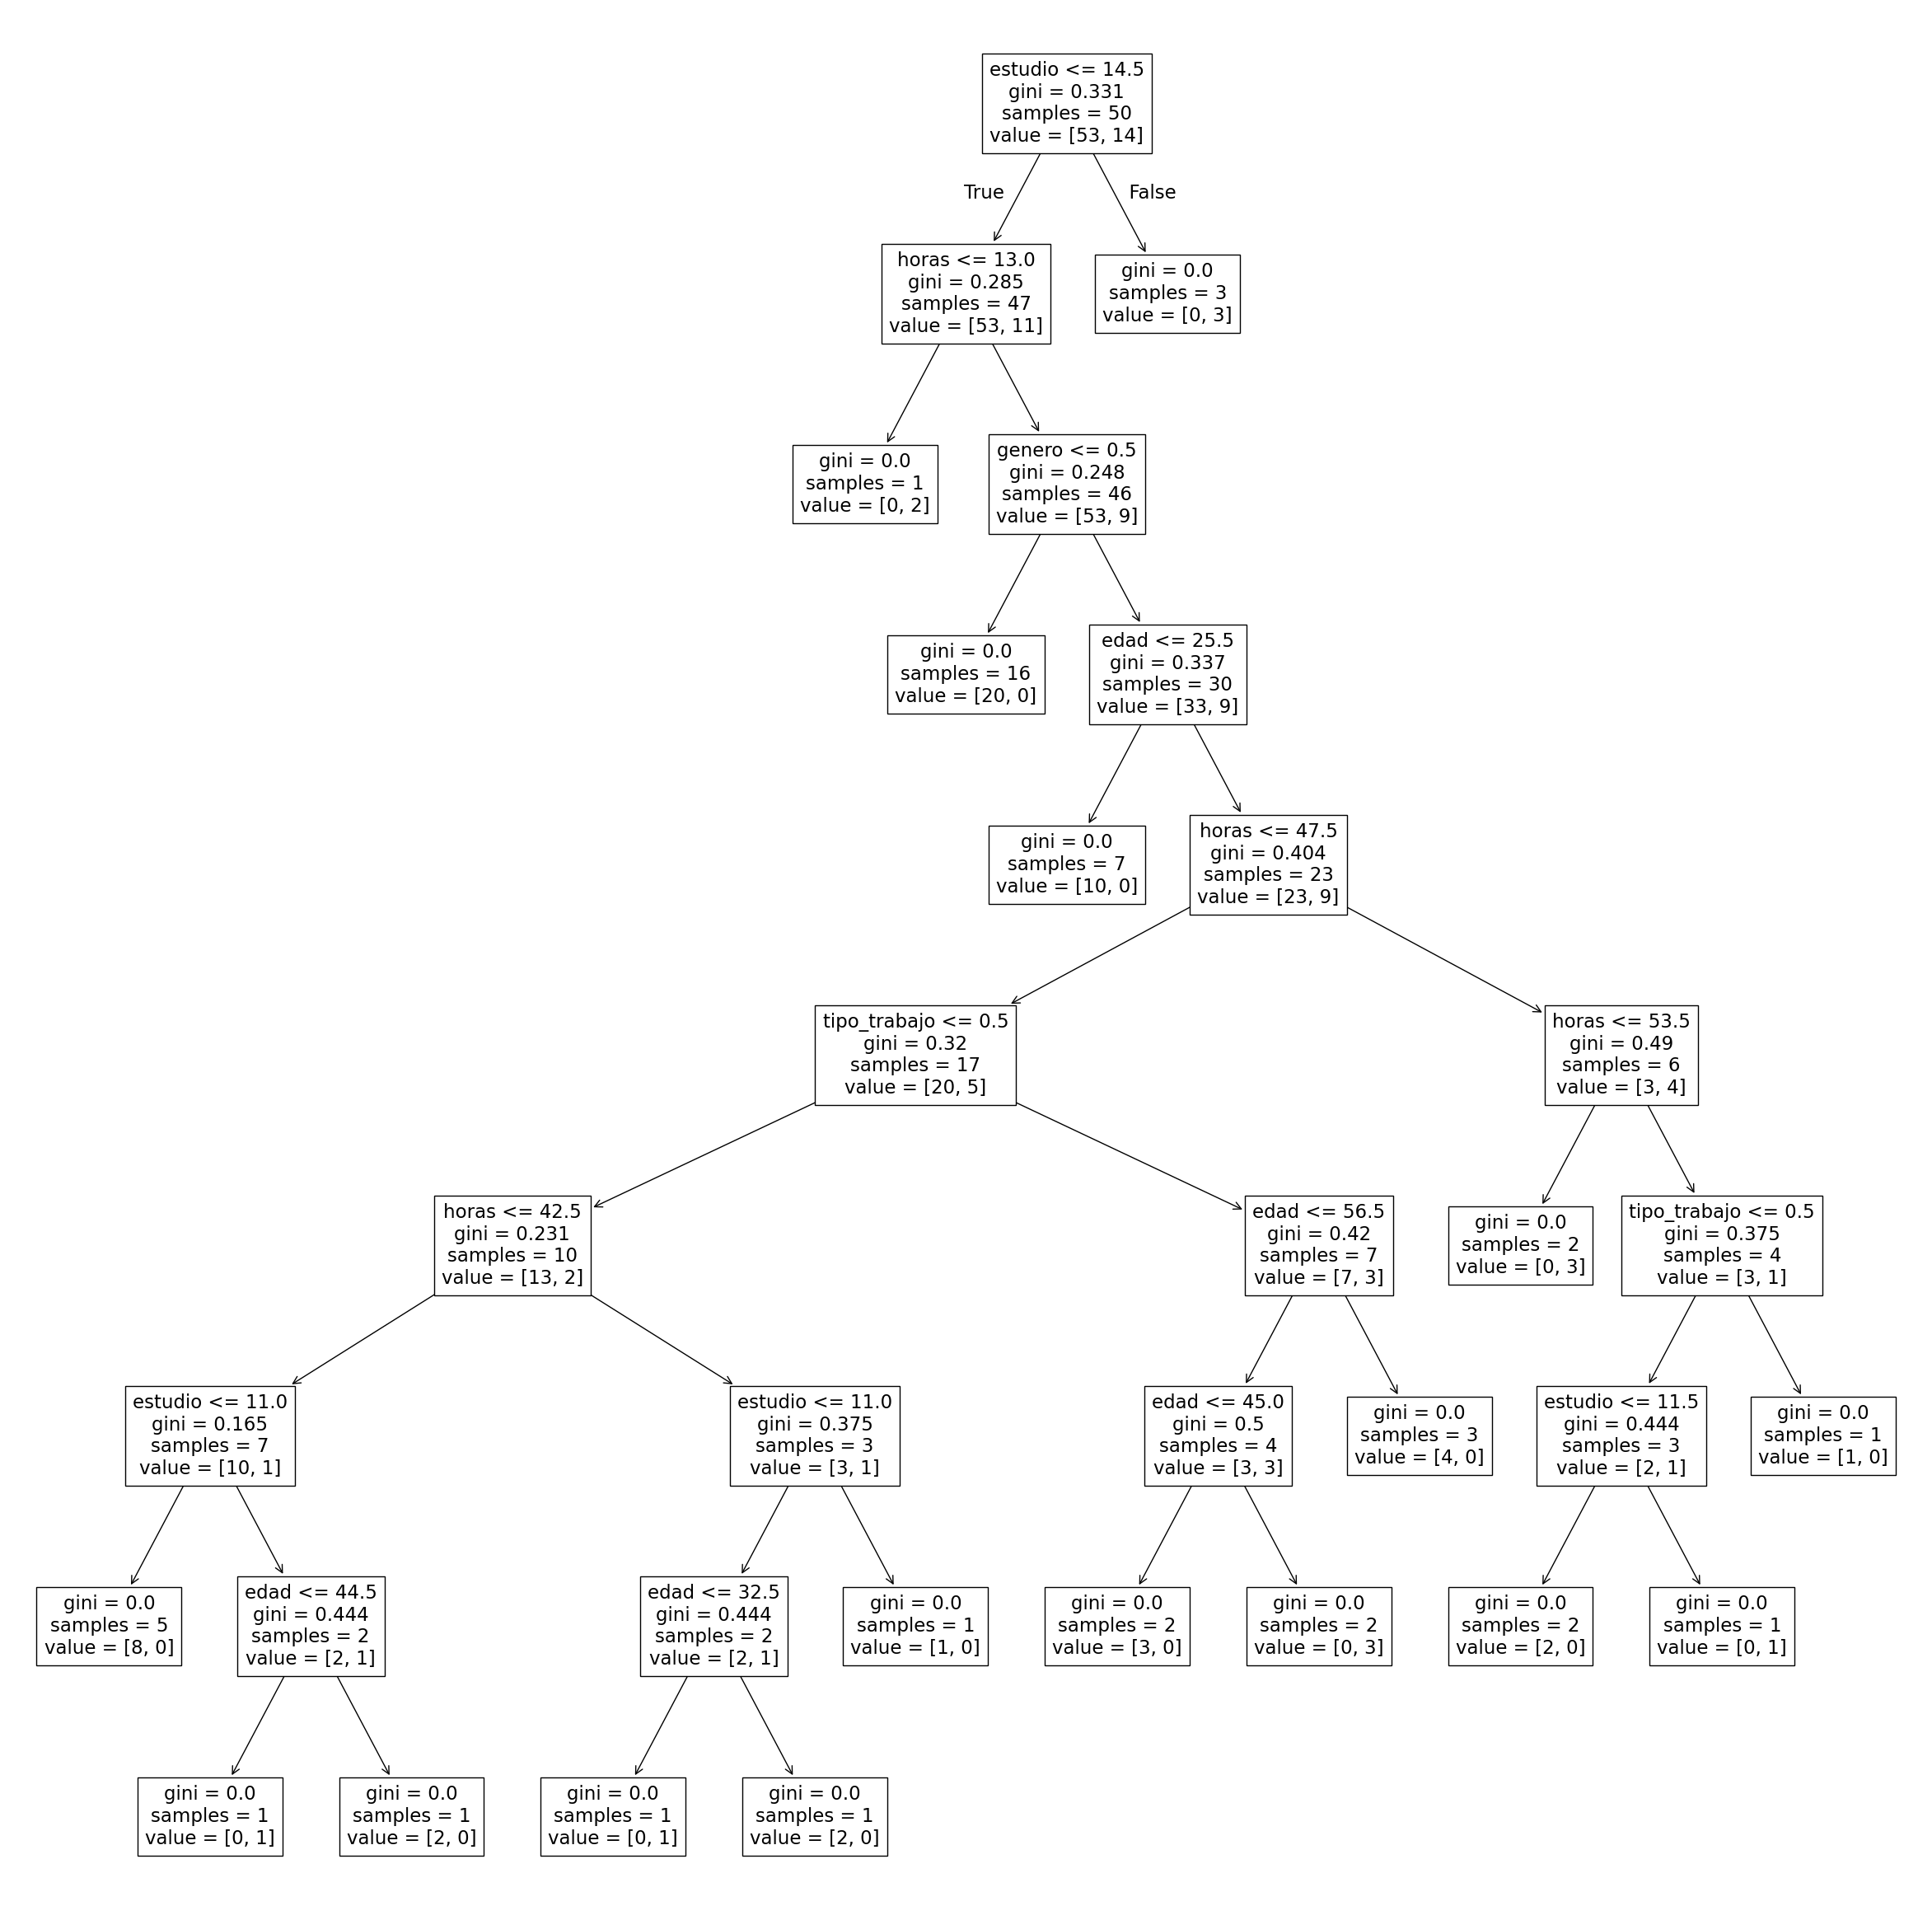

In [23]:
from sklearn import tree

for trees in forest.estimators_[1:5]:
    plt.figure(figsize=(30,30))
    tree.plot_tree(trees, feature_names=dataset.columns[:-1])
    plt.show()